### 학습목표
1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

In [14]:
import numpy as np
import pandas as pd
# seaborn
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

#### 데이터 로딩
1. 정제된 데이터 사용(retail.csv)

In [15]:
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int64,
    'Quantity': np.int32
}
retail = pd.read_csv('./OnlineRetailClean.csv', index_col=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
retail.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
CheckoutPrice    0
dtype: int64

#### 날짜 타입 데이터 변환
 - 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이

In [17]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  float64       
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 30.4+ MB


#### 해당 기간 동안의 매출
 - 전체 매출
 - 국가별 매출
 - 월별 매출
 - 요일별 매출
 - 시간별 매출

#### 전체 매출

In [18]:
np.sum(retail['CheckoutPrice'])

8911407.904

In [19]:
retail['CheckoutPrice'].sum()

8911407.904

#### 국가별 매출

In [23]:
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values(ascending = False)

[Text(0, 0, 'United Kingdom'),
 Text(1, 0, 'Netherlands'),
 Text(2, 0, 'EIRE'),
 Text(3, 0, 'Germany'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Australia'),
 Text(6, 0, 'Spain'),
 Text(7, 0, 'Switzerland'),
 Text(8, 0, 'Belgium'),
 Text(9, 0, 'Sweden'),
 Text(10, 0, 'Japan'),
 Text(11, 0, 'Norway'),
 Text(12, 0, 'Portugal'),
 Text(13, 0, 'Finland'),
 Text(14, 0, 'Singapore'),
 Text(15, 0, 'Channel Islands'),
 Text(16, 0, 'Denmark'),
 Text(17, 0, 'Italy'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Austria'),
 Text(20, 0, 'Poland'),
 Text(21, 0, 'Israel'),
 Text(22, 0, 'Greece'),
 Text(23, 0, 'Iceland'),
 Text(24, 0, 'Canada'),
 Text(25, 0, 'USA'),
 Text(26, 0, 'Malta'),
 Text(27, 0, 'Unspecified'),
 Text(28, 0, 'United Arab Emirates'),
 Text(29, 0, 'Lebanon'),
 Text(30, 0, 'Lithuania'),
 Text(31, 0, 'European Community'),
 Text(32, 0, 'Brazil'),
 Text(33, 0, 'RSA'),
 Text(34, 0, 'Czech Republic'),
 Text(35, 0, 'Bahrain'),
 Text(36, 0, 'Saudi Arabia')]

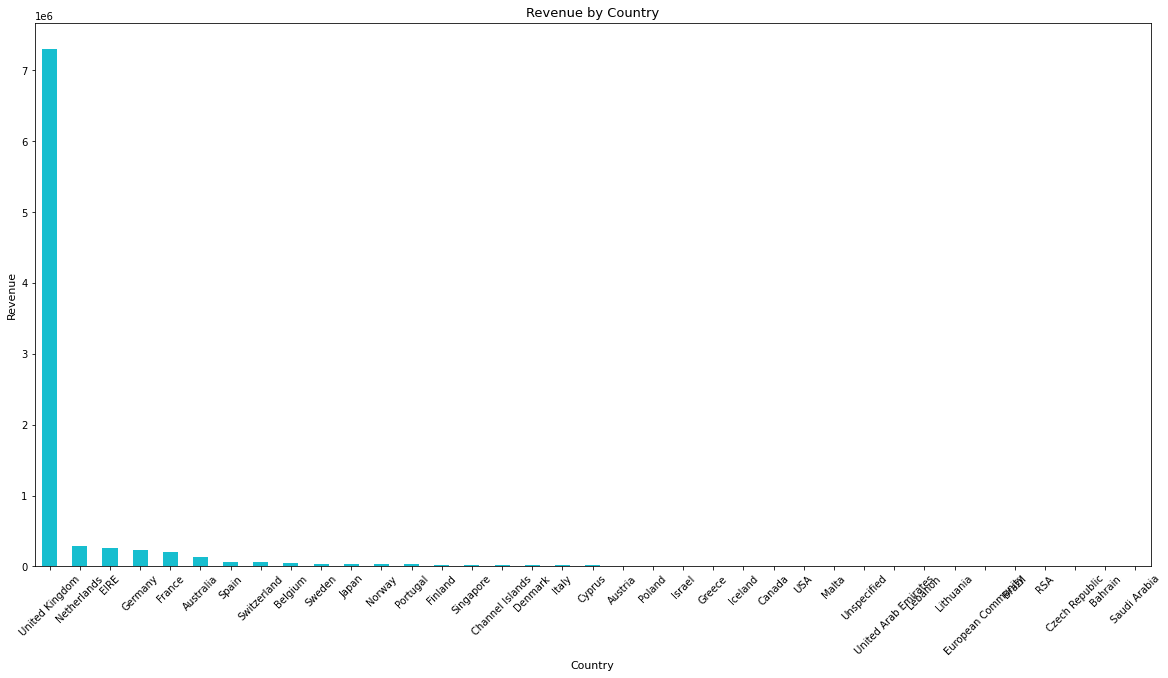

In [27]:
plot = rev_by_countries.plot(kind='bar', color=COLORS[-1], figsize=(20, 10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(rev_by_countries.index, rotation=45)

#### 그래프 유틸 함수

In [44]:
def plot_bar(df, xlabel, y_label, title, color= COLORS[0], figsize=(20,10), rotation=45):
    plot = df.plot(kind='bar', color = color , figsize=figsize)
    plot.set_xlabel(xlabel, fontsize = 11)
    plot.set_ylabel(y_label, fontsize = 11)
    plot.set_title(title, fontsize =13)
    plot.set_xticklabels(labels = df.index, rotation=rotation)

#### 월별 매출

In [50]:
def extract_month(x):
    month = str(x.month)
    if len(month) < 2:
        month =  '0'+ str(month)
    return str(x.year) + month

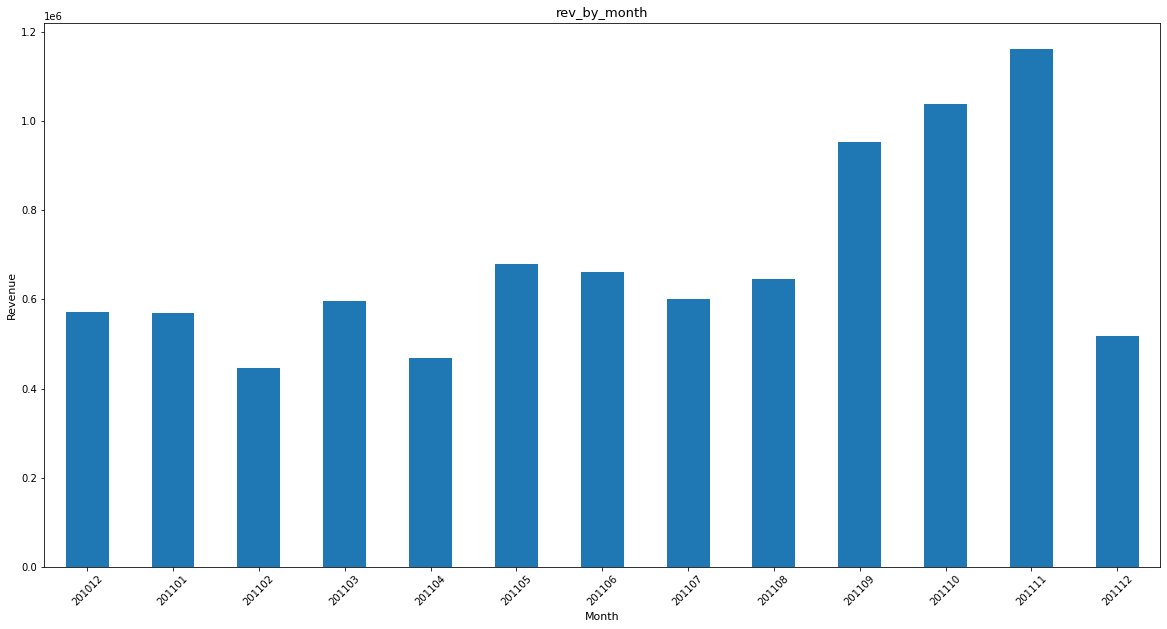

In [51]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']

plot_bar(rev_by_month, 'Month', 'Revenue','rev_by_month')

#### 요일별 매출

In [60]:
rev_week = retail.set_index('InvoiceDate').groupby(lambda x : x.weekday).sum()['CheckoutPrice']
rev_week.index = np.array(['mon', 'tue', 'wed', 'thu','fri', 'sun'])

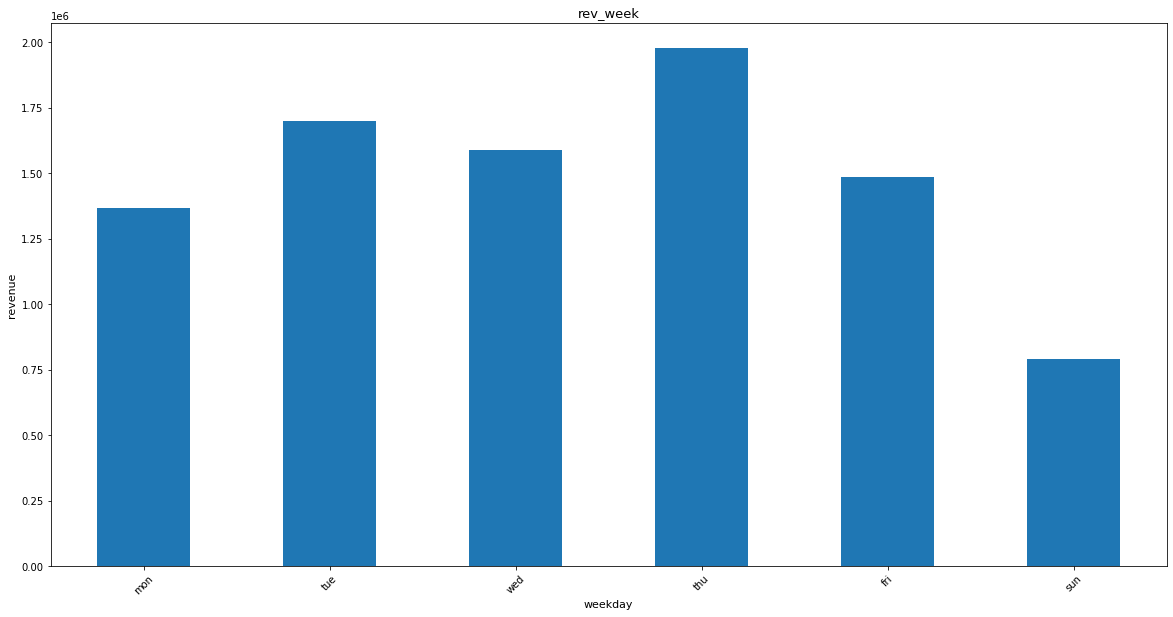

In [61]:
plot_bar(rev_week, 'weekday', 'revenue', 'rev_week')

#### 시간별 매출

In [63]:
rev_time = retail.set_index('InvoiceDate').groupby(lambda x : x.hour).sum()['CheckoutPrice']
rev_time

6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

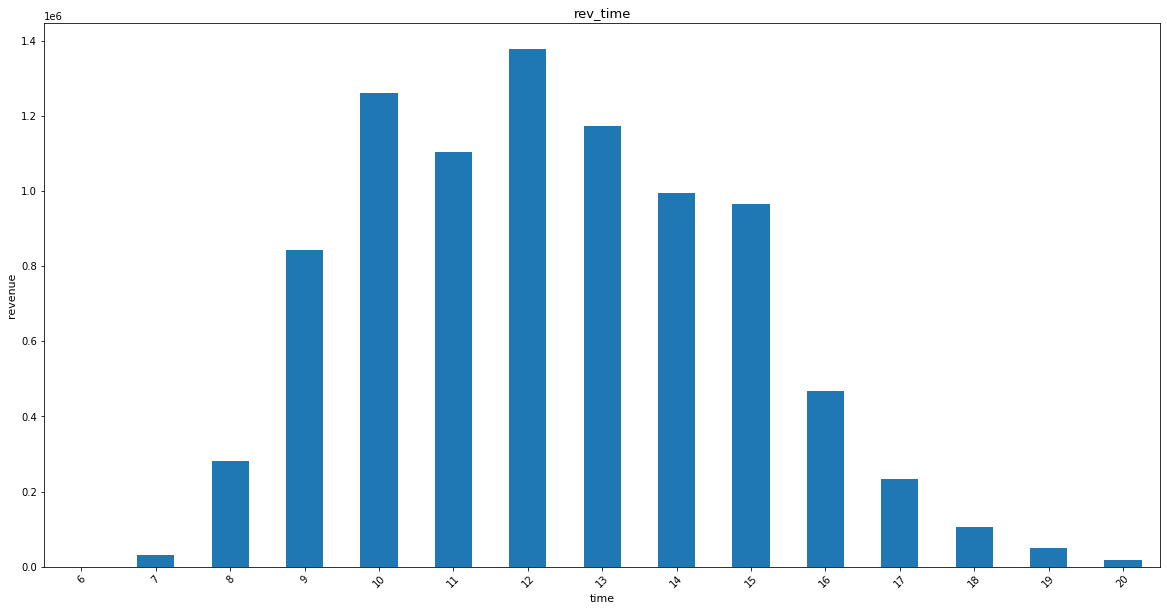

In [64]:
plot_bar(rev_time, 'time', 'revenue', 'rev_time')

#### 매출 데이터로부터 insight 
 - 전체 매출의 82%가 UK에서 발생
 - 11년도의 가장 많은 주문이 발생한 달 11월(12월의 전체 데이터가 반영이 되진 않았음)
  - 11, 12월의 판매량이 압도(블랙프라이데이, 사이버먼데이, 크리스마스 휴일)
 - 일주일중 목요일까지는 성장세를 보이다가, 이후로 하락(토요일에는 주문X)
 - 7시를 시작으로 주문이 시작되어 12시까지 증가세, 15시까지 하락을, 15시 이후 부터 급락)

#### 제품별 metrics
 - Top 10 판매 제품
 - Top 10 매출 제품

In [65]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [71]:
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending= False)[:10]

In [68]:
retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending= False)[:10]

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

#### top 3 아이템의 월별 판매량 추이

In [79]:
retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()['Quantity'].loc[top_selling[:3].index]

StockCode        
23843      201112    80995
23166      201101    74215
           201105      792
           201106      391
           201107      718
           201108      405
           201109      342
           201110      235
           201111      631
           201112      187
84077      201012     5139
           201101     1488
           201102     3457
           201103     3888
           201104    10224
           201105     4944
           201106     1920
           201107     3600
           201108     2256
           201109     3462
           201110     8174
           201111     4500
           201112     1363
Name: Quantity, dtype: int64

In [76]:
top_selling.index

Index(['23843', '23166', '84077', '22197', '85099B', '85123A', '84879',
       '21212', '23084', '22492'],
      dtype='object', name='StockCode')